# Limpiador de Datos - Dataset de Planetas/Exoplanetas

**Objetivo** Limpiar un dataset por código.

## Tareas de Limpieza:

1. Cargar e inspeccionar el dataset sucio
2. Identificar todos los problemas de calidad de datos
3. Limpiar cada tipo de error sistemáticamente
4. Validar los datos limpios
5. Realizar análisis básico
6. Generar visualizaciones

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configurar opciones de visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Configurar estilo para gráficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print('¡Librerías importadas exitosamente!')

¡Librerías importadas exitosamente!


## 1. Carga e Inspección Inicial

In [ ]:
# Cargar el dataset sucio
df_dirty = pd.read_csv('received_dirty_dataset.csv')

print(f'Dimensiones del dataset: {df_dirty.shape}')
print(f'\nNombres de columnas: {df_dirty.columns.tolist()}')
print(f'\nTipos de datos:\n{df_dirty.dtypes}')
print(f'\nPrimeras 10 filas:')
df_dirty.head(10)

Dimensiones del dataset: (1115, 6)

Nombres de columnas: ['method', 'number', 'orbital_period', 'mass', 'distance', 'year']

Tipos de datos:
method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

Primeras 10 filas:


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008
6,Radial Velocity,1,1773.400,4.64,18.15,2002
7,Radial Velocity,1,798.500,NaN,21.41,1996
8,Radial Velocity,1,993.300,10.30,73.10,2008
9,Radial Velocity,2,452.800,1.99,74.79,2010


In [ ]:
# Estadísticas básicas
print('ESTADÍSTICAS BÁSICAS:')
print('\n')
print(f'\nInformación del dataset:')
df_dirty.info()

print(f'\n\nEstadísticas descriptivas:')
df_dirty.describe()

ESTADÍSTICAS BÁSICAS:



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1115 non-null   object 
 1   number          1115 non-null   int64  
 2   orbital_period  1061 non-null   float64
 3   mass            556 non-null    float64
 4   distance        873 non-null    float64
 5   year            1115 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 52.4+ KB


Estadísticas descriptivas:


,number,orbital_period,mass,distance,year
count,1115.000000,1061.000000,556.000000,873.000000,1115.000000
mean,1.783857,1895.516105,2.648196,266.808121,2009.062780
std,1.244344,25157.473766,3.832351,766.147263,3.955725
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.487000,0.227750,32.700000,2007.000000
50%,1.000000,42.151642,1.255000,55.040000,2010.000000
75%,2.000000,516.220000,3.092500,173.000000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


## 2. Identificar Problemas de Calidad de Datos

In [ ]:
print('EVALUACIÓN DE CALIDAD DE DATOS:')
print('\n')

# Verificar valores faltantes
print('\n1. VALORES FALTANTES:')
missing = df_dirty.isnull().sum()
missing_pct = (missing / len(df_dirty)) * 100
missing_df = pd.DataFrame({
    'Cantidad Faltante': missing,
    'Porcentaje': missing_pct
})
print(missing_df[missing_df['Cantidad Faltante'] > 0].sort_values('Cantidad Faltante', ascending=False))

# Verificar duplicados
print('\n2. DUPLICADOS:')
duplicates = df_dirty.duplicated().sum()
print(f'Total de filas duplicadas: {duplicates}')
if duplicates > 0:
    print(f'\nEjemplos de duplicados:')
    print(df_dirty[df_dirty.duplicated(keep=False)].head(10))

# Verificar tipos de datos
print('\n3. TIPOS DE DATOS:')
print(df_dirty.dtypes)

# Verificar valores atípicos en columnas numéricas
print('\n4. VALORES ATÍPICOS POTENCIALES (método IQR):')
numeric_cols = df_dirty.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    Q1 = df_dirty[col].quantile(0.25)
    Q3 = df_dirty[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_dirty[(df_dirty[col] < Q1 - 1.5*IQR) | (df_dirty[col] > Q3 + 1.5*IQR)][col]
    if len(outliers) > 0:
        print(f'  {col}: {len(outliers)} valores atípicos detectados')

# Verificar valores únicos en columnas categóricas
print('\n5. COLUMNAS CATEGÓRICAS:')
categorical_cols = df_dirty.select_dtypes(include=['object']).columns
for col in categorical_cols:
    unique_count = df_dirty[col].nunique()
    print(f'  {col}: {unique_count} valores únicos')
    if unique_count < 20:
        print(f'Valores: {df_dirty[col].unique()[:10]}')

EVALUACIÓN DE CALIDAD DE DATOS:



1. VALORES FALTANTES:
                Cantidad Faltante  Porcentaje
mass                          559   50.134529
distance                      242   21.704036
orbital_period                 54    4.843049

2. DUPLICADOS:
Total de filas duplicadas: 84

Ejemplos de duplicados:
              method  number  orbital_period  mass  distance  year
10   Radial Velocity       2       883.00000  0.86     74.79  2010
31           Imaging       1             NaN   NaN    140.00  2004
33           Imaging       1             NaN   NaN       NaN  2008
35           Imaging       1             NaN   NaN    139.00  2004
59   Radial Velocity       1       187.83000   NaN     84.03  2012
70           Imaging       1             NaN   NaN     36.00  2013
76   Radial Velocity       1       655.60000  5.10     37.54  2008
109          Transit       1         3.89713   NaN    770.00  2011
111          Transit       1         3.63130   NaN    600.00  2011
113       Astromet

## 3. Pasos de Limpieza de Datos

In [ ]:
# Crear una copia para limpieza
df_clean = df_dirty.copy()
print(f'Iniciando proceso de limpieza...')
print(f'Dimensiones iniciales: {df_clean.shape}')

Iniciando proceso de limpieza...
Dimensiones iniciales: (1115, 6)


### 3.1 Eliminar Duplicados

In [ ]:
# Eliminar duplicados exactos
initial_rows = len(df_clean)
df_clean = df_clean.drop_duplicates()
removed_duplicates = initial_rows - len(df_clean)

print(f'Eliminadas {removed_duplicates} filas duplicadas')
print(f'Nuevas dimensiones: {df_clean.shape}')

Eliminadas 84 filas duplicadas
Nuevas dimensiones: (1031, 6)


### 3.2 Manejar Valores Faltantes

In [ ]:
# Estrategia para manejar valores faltantes
print('Manejando valores faltantes...\n')

# Para 'mass' y 'distance' - estos son campos numéricos importantes
# Mantendremos filas con valores faltantes pero las marcaremos para análisis
missing_before = df_clean.isnull().sum().sum()

# Opción 1: Para columnas críticas, podríamos querer mantener las filas
# Opción 2: Para columnas no críticas, podemos rellenar con mediana/moda
# Opción 3: Eliminar filas con demasiados valores faltantes

# Verificar cuántos valores faltantes por fila
missing_per_row = df_clean.isnull().sum(axis=1)
print(f'Filas con valores faltantes: {(missing_per_row > 0).sum()}')
print(f'Filas con 3+ valores faltantes: {(missing_per_row >= 3).sum()}')

# Eliminar filas con más del 50% de valores faltantes
threshold = len(df_clean.columns) * 0.5
df_clean = df_clean[missing_per_row < threshold]

print(f'\nEliminadas filas con valores faltantes excesivos')
print(f'Nuevas dimensiones: {df_clean.shape}')
print(f'Valores faltantes restantes: {df_clean.isnull().sum().sum()}')

Manejando valores faltantes...

Filas con valores faltantes: 533
Filas con 3+ valores faltantes: 8

Eliminadas filas con valores faltantes excesivos
Nuevas dimensiones: (1023, 6)
Valores faltantes restantes: 757


### 3.3 Corregir Tipos de Datos

In [ ]:
# Convertir columnas a tipos de datos apropiados
print('Convirtiendo tipos de datos...\n')

# Columnas numéricas
numeric_columns = ['number', 'orbital_period', 'mass', 'distance', 'year']

for col in numeric_columns:
    if col in df_clean.columns:
        # Convertir a numérico, forzando errores a NaN
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        print(f'Convertido {col} a numérico')

# Columna categórica
if 'method' in df_clean.columns:
    df_clean['method'] = df_clean['method'].astype('string')
    print(f'Convertido method a string')

print(f'\nTipos de datos actualizados:\n{df_clean.dtypes}')

Convirtiendo tipos de datos...

Convertido number a numérico
Convertido orbital_period a numérico
Convertido mass a numérico
Convertido distance a numérico
Convertido year a numérico
Convertido method a string

Tipos de datos actualizados:
method            string[python]
number                     int64
orbital_period           float64
mass                     float64
distance                 float64
year                       int64
dtype: object


### 3.4 Manejar Valores Atípicos

In [ ]:
# Identificar y manejar valores atípicos
print('Manejando valores atípicos...\n')

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR  # Usando 3*IQR para detección más conservadora
    upper_bound = Q3 + 3 * IQR
    return (data[column] < lower_bound) | (data[column] > upper_bound)

# Verificar valores atípicos en columnas numéricas
outlier_counts = {}
for col in ['orbital_period', 'mass', 'distance']:
    if col in df_clean.columns:
        outliers = detect_outliers_iqr(df_clean, col)
        outlier_counts[col] = outliers.sum()
        print(f'{col}: {outliers.sum()} valores atípicos detectados')

# Para este dataset, los valores atípicos pueden ser legítimos (ej. planetas muy grandes)
# Así que los mantendremos pero los anotaremos
print(f'\nValores atípicos identificados pero conservados (pueden representar valores extremos reales)')

Manejando valores atípicos...

orbital_period: 89 valores atípicos detectados
mass: 20 valores atípicos detectados
distance: 79 valores atípicos detectados

Valores atípicos identificados pero conservados (pueden representar valores extremos reales)


### 3.5 Limpiar Datos de Texto

In [ ]:
# Limpiar columnas de texto (eliminar espacios extra, estandarizar)
print('Limpiando datos de texto...\n')

if 'method' in df_clean.columns:
    # Eliminar espacios al inicio/final
    df_clean['method'] = df_clean['method'].str.strip()
    
    # Estandarizar capitalización
    df_clean['method'] = df_clean['method'].str.title()
    
    print(f"Limpiada columna 'method'")
    print(f'Métodos únicos: {df_clean['method'].nunique()}')
    print(f'Métodos: {df_clean['method'].unique()}')

Limpiando datos de texto...

Limpiada columna 'method'
Métodos únicos: 10
Métodos: <StringArray>
[              'Radial Velocity',                       'Imaging',
     'Eclipse Timing Variations',                       'Transit',
                    'Astrometry',     'Transit Timing Variations',
 'Orbital Brightness Modulation',                  'Microlensing',
                 'Pulsar Timing',   'Pulsation Timing Variations']
Length: 10, dtype: string


### 3.6 Validar Columna de Año

In [ ]:
# Validar valores de año (deben ser años razonables)
print('Validando columna de año...\n')

if 'year' in df_clean.columns:
    # Los años deben estar entre 1990 y el año actual (descubrimientos de exoplanetas)
    current_year = 2024
    invalid_years = df_clean[(df_clean['year'] < 1990) | (df_clean['year'] > current_year)]
    
    print(f'Años inválidos encontrados: {len(invalid_years)}')
    if len(invalid_years) > 0:
        print(f'Valores de año inválidos: {invalid_years['year'].unique()}')
        # Establecer años inválidos a NaN
        df_clean.loc[(df_clean['year'] < 1990) | (df_clean['year'] > current_year), 'year'] = np.nan
    
    print(f'Columna de año validada')
    print(f'Rango de años: {df_clean['year'].min()} - {df_clean['year'].max()}')

Validando columna de año...

Años inválidos encontrados: 1
Valores de año inválidos: [1989]
Columna de año validada
Rango de años: 1992.0 - 2014.0


### 3.7 Validación Final

In [ ]:
# Validación final y resumen
print('VALIDACIÓN FINAL:')
print('\n')

print(f'\nDimensiones del dataset original: {df_dirty.shape}')
print(f'Dimensiones del dataset limpio: {df_clean.shape}')
print(f'Filas eliminadas: {len(df_dirty) - len(df_clean)}')

print(f'\nValores faltantes restantes:')
print(df_clean.isnull().sum())

print(f'\nTipos de datos:')
print(df_clean.dtypes)

print(f'\n¡Limpieza de datos completada!')

VALIDACIÓN FINAL:



Dimensiones del dataset original: (1115, 6)
Dimensiones del dataset limpio: (1023, 6)
Filas eliminadas: 92

Valores faltantes restantes:
method              0
number              0
orbital_period     31
mass              510
distance          216
year                1
dtype: int64

Tipos de datos:
method            string[python]
number                     int64
orbital_period           float64
mass                     float64
distance                 float64
year                     float64
dtype: object

¡Limpieza de datos completada!


## 4. Guardar Dataset Limpio

In [ ]:
# Guardar el dataset limpio
df_clean.to_csv('clean_dataset.csv', index=False)

print("Dataset limpio guardado como 'clean_dataset.csv'")
print(f"\nVista previa del dataset limpio:")
df_clean.head(10)

Dataset limpio guardado como 'clean_dataset.csv'

Vista previa del dataset limpio:


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006.0
1,Radial Velocity,1,874.774,2.21,56.95,2008.0
2,Radial Velocity,1,763.000,2.60,19.84,2011.0
3,Radial Velocity,1,326.030,19.40,110.62,2007.0
4,Radial Velocity,1,516.220,10.50,119.47,2009.0
5,Radial Velocity,1,185.840,4.80,76.39,2008.0
6,Radial Velocity,1,1773.400,4.64,18.15,2002.0
7,Radial Velocity,1,798.500,NaN,21.41,1996.0
8,Radial Velocity,1,993.300,10.30,73.10,2008.0
9,Radial Velocity,2,452.800,1.99,74.79,2010.0


## 5. Análisis Básico

Ahora que los datos están limpios, realicemos un análisis básico.

### 5.1 Estadísticas Resumen

In [ ]:
print('ESTADÍSTICAS RESUMEN:')
print('\n')

# Estadísticas descriptivas para columnas numéricas
print('\nColumnas numéricas:')
print(df_clean.describe())

# Análisis categórico
print('\n\nAnálisis categórico - Métodos de Detección:')
if 'method' in df_clean.columns:
    method_counts = df_clean['method'].value_counts()
    print(method_counts)
    print(f'\nTotal de métodos únicos: {df_clean['method'].nunique()}')

ESTADÍSTICAS RESUMEN:



Columnas numéricas:
            number  orbital_period        mass     distance         year
count  1023.000000      992.000000  513.000000   807.000000  1022.000000
mean      1.791789     2002.917596    2.638161   259.340743  2009.092955
std       1.245206    26014.728304    3.818617   721.136649     3.938828
min       1.000000        0.090706    0.003600     1.350000  1992.000000
25%       1.000000        5.442540    0.229000    32.560000  2007.000000
50%       1.000000       39.979500    1.260000    55.190000  2010.000000
75%       2.000000      526.005000    3.040000   176.720000  2012.000000
max       7.000000   730000.000000   25.000000  8500.000000  2014.000000


Análisis categórico - Métodos de Detección:
method
Radial Velocity                  553
Transit                          397
Imaging                           34
Microlensing                      16
Eclipse Timing Variations          9
Pulsar Timing                      5
Orbital Brightness Modu

### 5.2 Conteos de Frecuencia

In [ ]:
print('ANÁLISIS DE FRECUENCIAS:')
print('\n')

# Descubrimientos por año
if 'year' in df_clean.columns:
    print('\nDescubrimientos por año:')
    year_counts = df_clean['year'].value_counts().sort_index()
    print(year_counts.tail(10))  # Últimos 10 años

# Número de planetas por sistema
if 'number' in df_clean.columns:
    print('\n\nDistribución de planetas por sistema:')
    number_counts = df_clean['number'].value_counts().sort_index()
    print(number_counts.head(10))

ANÁLISIS DE FRECUENCIAS:



Descubrimientos por año:
year
2005.0     39
2006.0     30
2007.0     53
2008.0     70
2009.0     96
2010.0    100
2011.0    185
2012.0    139
2013.0    118
2014.0     51
Name: count, dtype: int64


Distribución de planetas por sistema:
number
1    585
2    258
3     87
4     32
5     30
6     24
7      7
Name: count, dtype: int64


### 5.3 Correlaciones

In [ ]:
# Análisis de correlación
print('ANÁLISIS DE CORRELACIÓN:')
print('\n')

# Seleccionar columnas numéricas para correlación
numeric_df = df_clean[['orbital_period', 'mass', 'distance', 'year']].dropna()

if len(numeric_df) > 0:
    correlation_matrix = numeric_df.corr()
    print('\nMatriz de correlación:')
    print(correlation_matrix)
else:
    print('\nNo hay suficientes datos para análisis de correlación')

ANÁLISIS DE CORRELACIÓN:



Matriz de correlación:
                orbital_period      mass  distance      year
orbital_period        1.000000  0.188772 -0.035335  0.066980
mass                  0.188772  1.000000  0.277137 -0.118619
distance             -0.035335  0.277137  1.000000  0.194761
year                  0.066980 -0.118619  0.194761  1.000000


## 6. Visualizaciones

### 6.1 Gráficos de Distribución

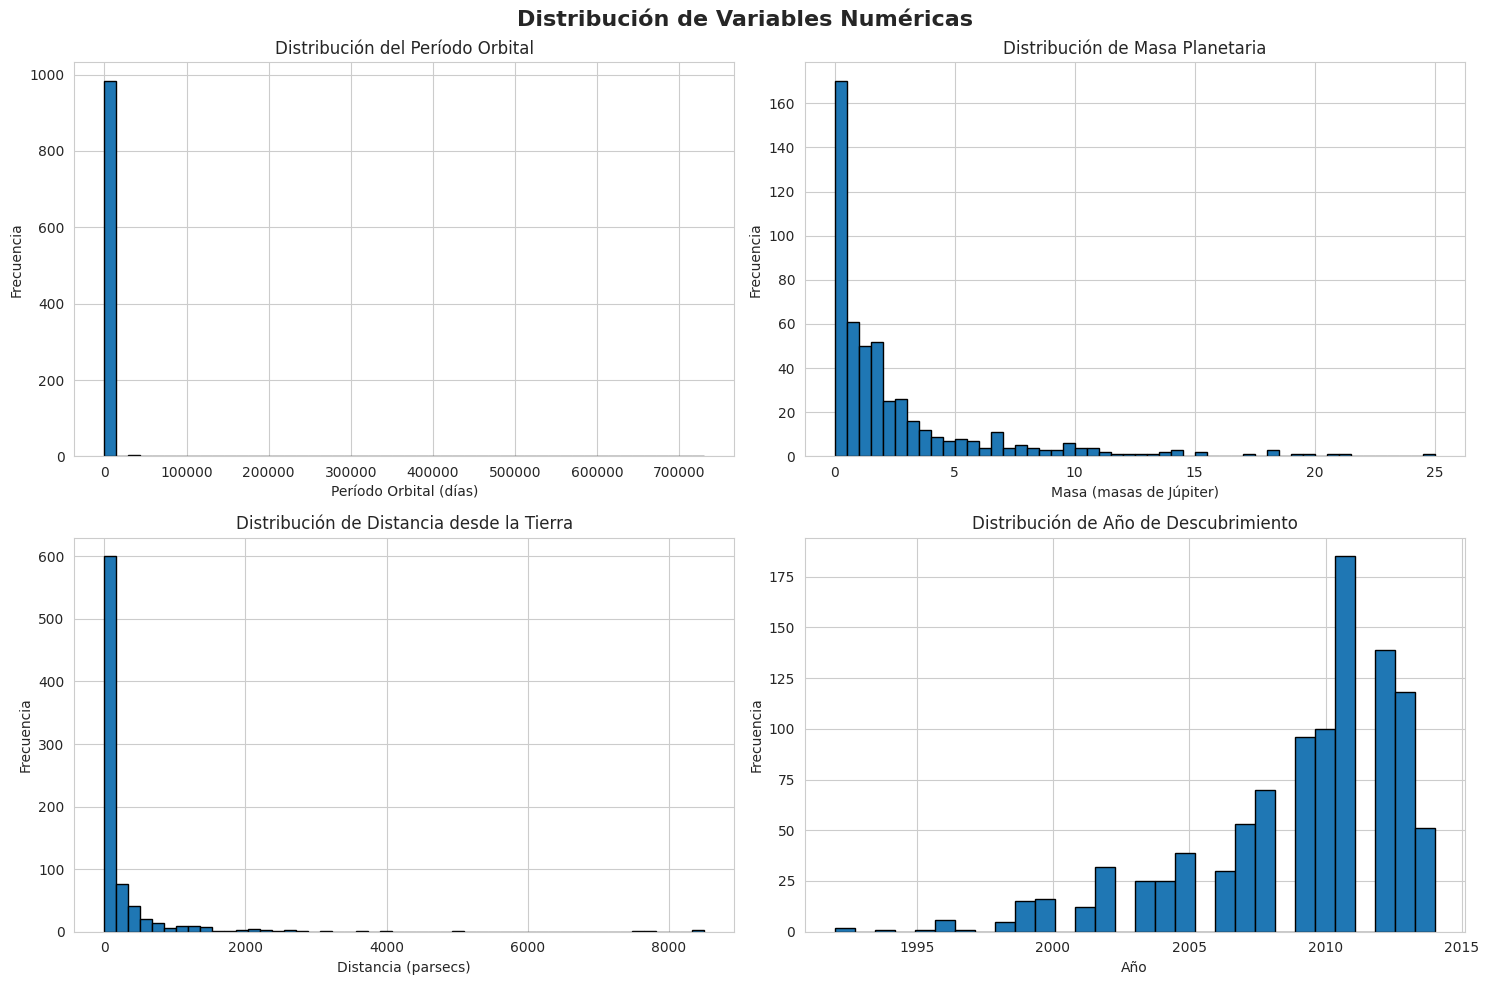

Gráficos de distribución creados


In [ ]:
# Histogramas para variables numéricas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribución de Variables Numéricas', fontsize=16, fontweight='bold')

# Período orbital
if 'orbital_period' in df_clean.columns:
    df_clean['orbital_period'].dropna().hist(bins=50, ax=axes[0, 0], edgecolor='black')
    axes[0, 0].set_title('Distribución del Período Orbital')
    axes[0, 0].set_xlabel('Período Orbital (días)')
    axes[0, 0].set_ylabel('Frecuencia')

# Masa
if 'mass' in df_clean.columns:
    df_clean['mass'].dropna().hist(bins=50, ax=axes[0, 1], edgecolor='black')
    axes[0, 1].set_title('Distribución de Masa Planetaria')
    axes[0, 1].set_xlabel('Masa (masas de Júpiter)')
    axes[0, 1].set_ylabel('Frecuencia')

# Distancia
if 'distance' in df_clean.columns:
    df_clean['distance'].dropna().hist(bins=50, ax=axes[1, 0], edgecolor='black')
    axes[1, 0].set_title('Distribución de Distancia desde la Tierra')
    axes[1, 0].set_xlabel('Distancia (parsecs)')
    axes[1, 0].set_ylabel('Frecuencia')

# Año
if 'year' in df_clean.columns:
    df_clean['year'].dropna().hist(bins=30, ax=axes[1, 1], edgecolor='black')
    axes[1, 1].set_title('Distribución de Año de Descubrimiento')
    axes[1, 1].set_xlabel('Año')
    axes[1, 1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

print('Gráficos de distribución creados')

### 6.2 Diagramas de Caja

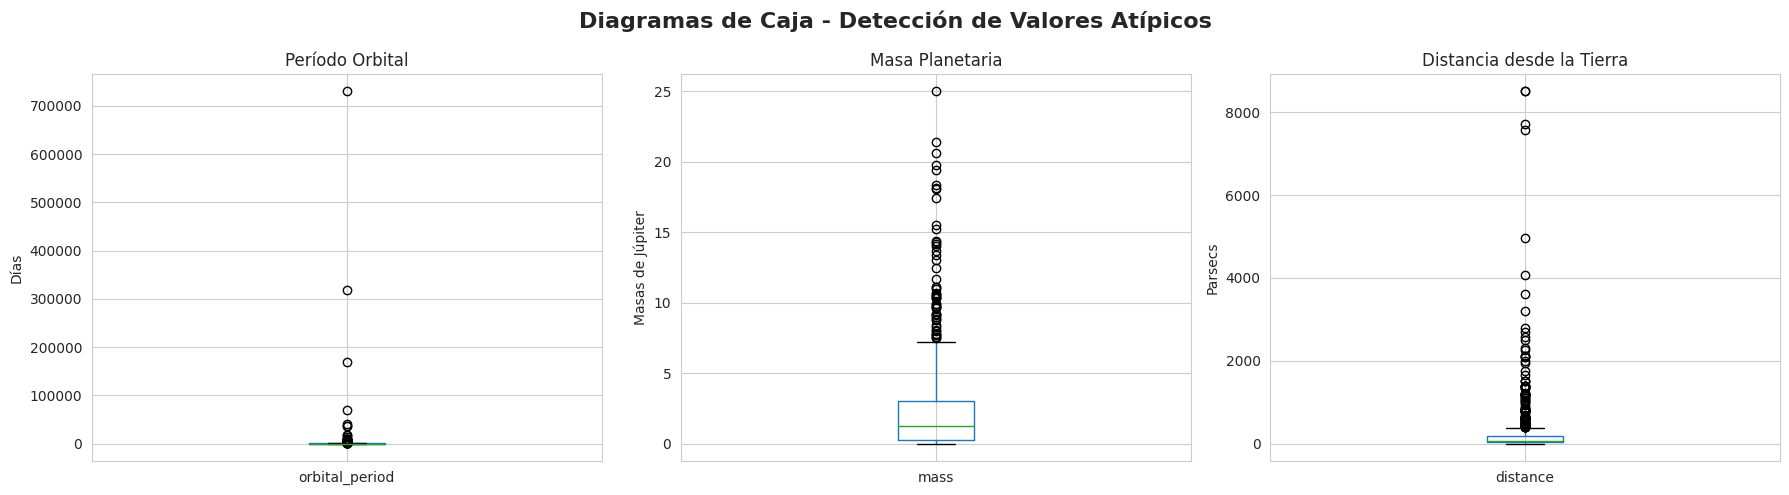

Diagramas de caja creados


In [ ]:
# Diagramas de caja para identificar valores atípicos
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Diagramas de Caja - Detección de Valores Atípicos', fontsize=16, fontweight='bold')

# Período orbital
if 'orbital_period' in df_clean.columns:
    df_clean.boxplot(column='orbital_period', ax=axes[0])
    axes[0].set_title('Período Orbital')
    axes[0].set_ylabel('Días')

# Masa
if 'mass' in df_clean.columns:
    df_clean.boxplot(column='mass', ax=axes[1])
    axes[1].set_title('Masa Planetaria')
    axes[1].set_ylabel('Masas de Júpiter')

# Distancia
if 'distance' in df_clean.columns:
    df_clean.boxplot(column='distance', ax=axes[2])
    axes[2].set_title('Distancia desde la Tierra')
    axes[2].set_ylabel('Parsecs')

plt.tight_layout()
plt.show()

print('Diagramas de caja creados')

### 6.3 Análisis Categórico - Métodos de Detección

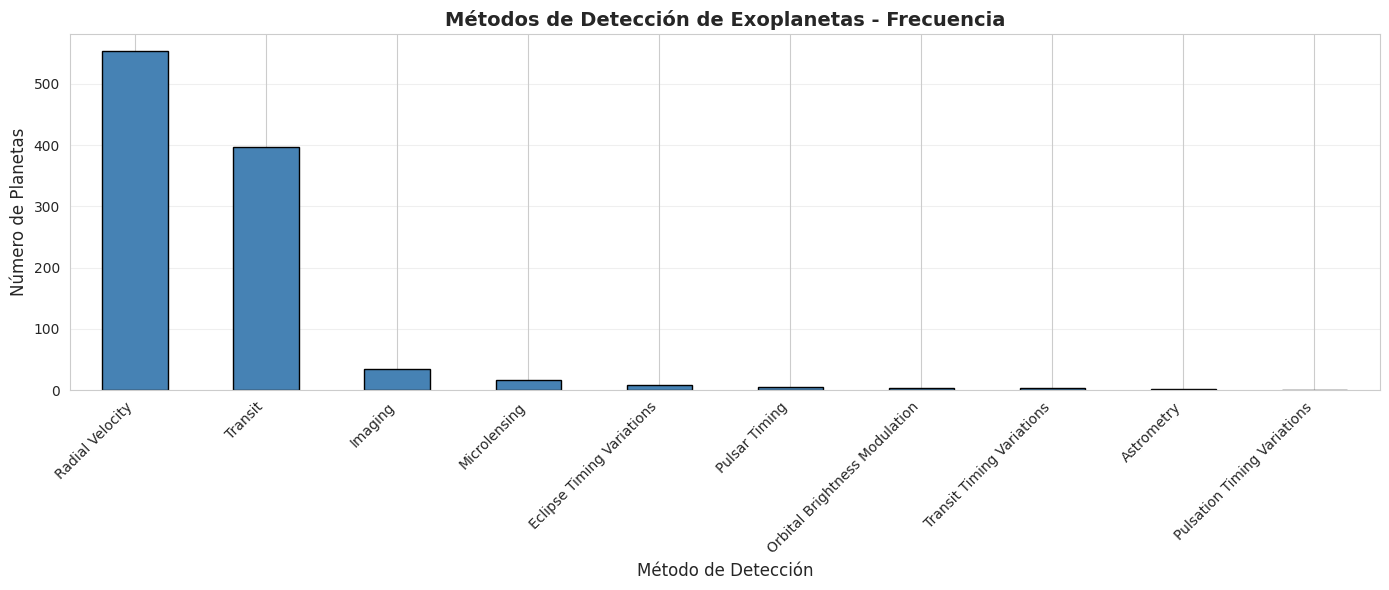

Gráfico de barras de métodos de detección creado


In [ ]:
# Gráfico de barras para métodos de detección
if 'method' in df_clean.columns:
    plt.figure(figsize=(14, 6))
    method_counts = df_clean['method'].value_counts()
    method_counts.plot(kind='bar', color='steelblue', edgecolor='black')
    plt.title('Métodos de Detección de Exoplanetas - Frecuencia', fontsize=14, fontweight='bold')
    plt.xlabel('Método de Detección', fontsize=12)
    plt.ylabel('Número de Planetas', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print('Gráfico de barras de métodos de detección creado')

### 6.4 Serie Temporal - Descubrimientos a lo Largo del Tiempo

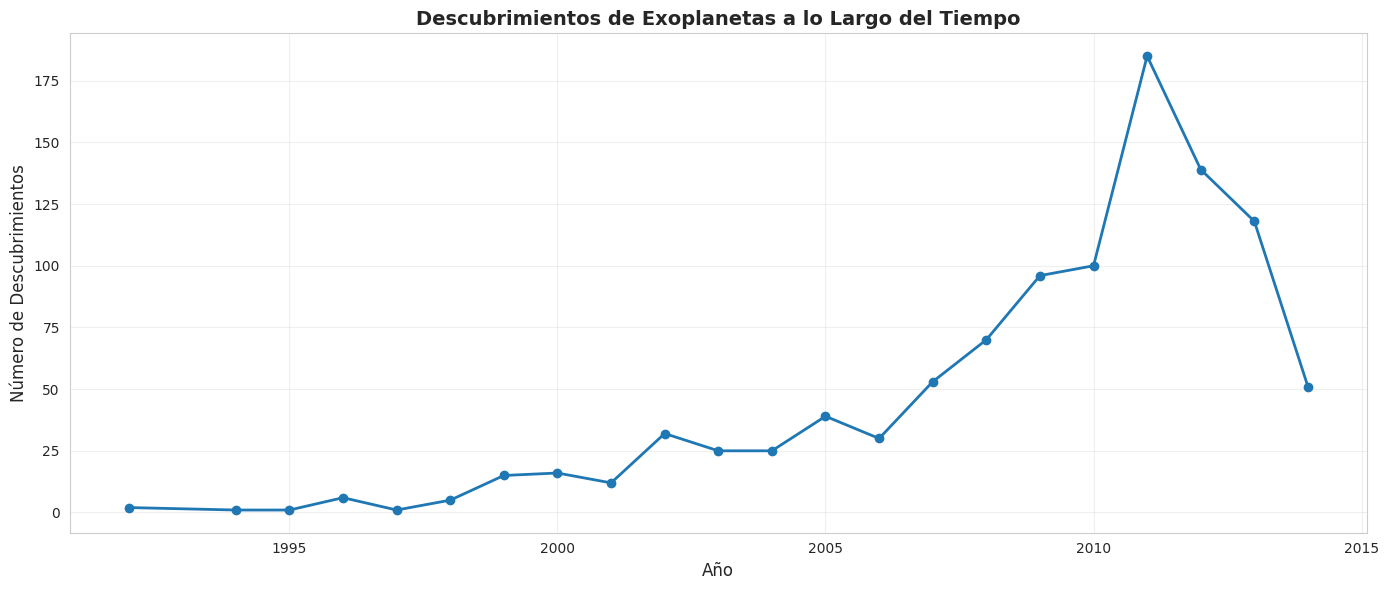

Gráfico de serie temporal creado


In [ ]:
# Descubrimientos a lo largo del tiempo
if 'year' in df_clean.columns:
    plt.figure(figsize=(14, 6))
    year_counts = df_clean['year'].value_counts().sort_index()
    plt.plot(year_counts.index, year_counts.values, marker='o', linewidth=2, markersize=6)
    plt.title('Descubrimientos de Exoplanetas a lo Largo del Tiempo', fontsize=14, fontweight='bold')
    plt.xlabel('Año', fontsize=12)
    plt.ylabel('Número de Descubrimientos', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print('Gráfico de serie temporal creado')

### 6.5 Gráficos de Dispersión - Relaciones

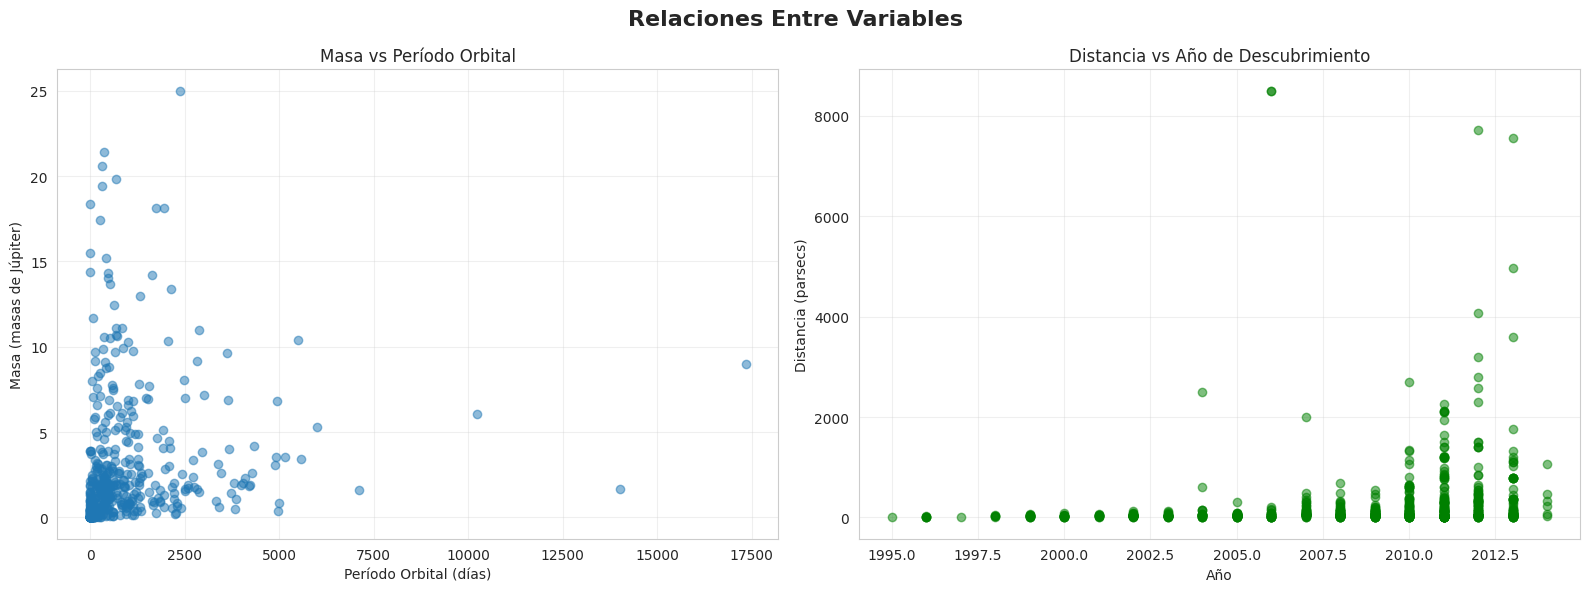

Gráficos de dispersión creados


In [ ]:
# Gráficos de dispersión para relaciones
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Relaciones Entre Variables', fontsize=16, fontweight='bold')

# Masa vs Período Orbital
if 'mass' in df_clean.columns and 'orbital_period' in df_clean.columns:
    scatter_data = df_clean[['mass', 'orbital_period']].dropna()
    axes[0].scatter(scatter_data['orbital_period'], scatter_data['mass'], alpha=0.5)
    axes[0].set_title('Masa vs Período Orbital')
    axes[0].set_xlabel('Período Orbital (días)')
    axes[0].set_ylabel('Masa (masas de Júpiter)')
    axes[0].grid(True, alpha=0.3)

# Distancia vs Año
if 'distance' in df_clean.columns and 'year' in df_clean.columns:
    scatter_data = df_clean[['distance', 'year']].dropna()
    axes[1].scatter(scatter_data['year'], scatter_data['distance'], alpha=0.5, color='green')
    axes[1].set_title('Distancia vs Año de Descubrimiento')
    axes[1].set_xlabel('Año')
    axes[1].set_ylabel('Distancia (parsecs)')
    axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print('Gráficos de dispersión creados')

### 6.6 Mapa de Calor de Correlación

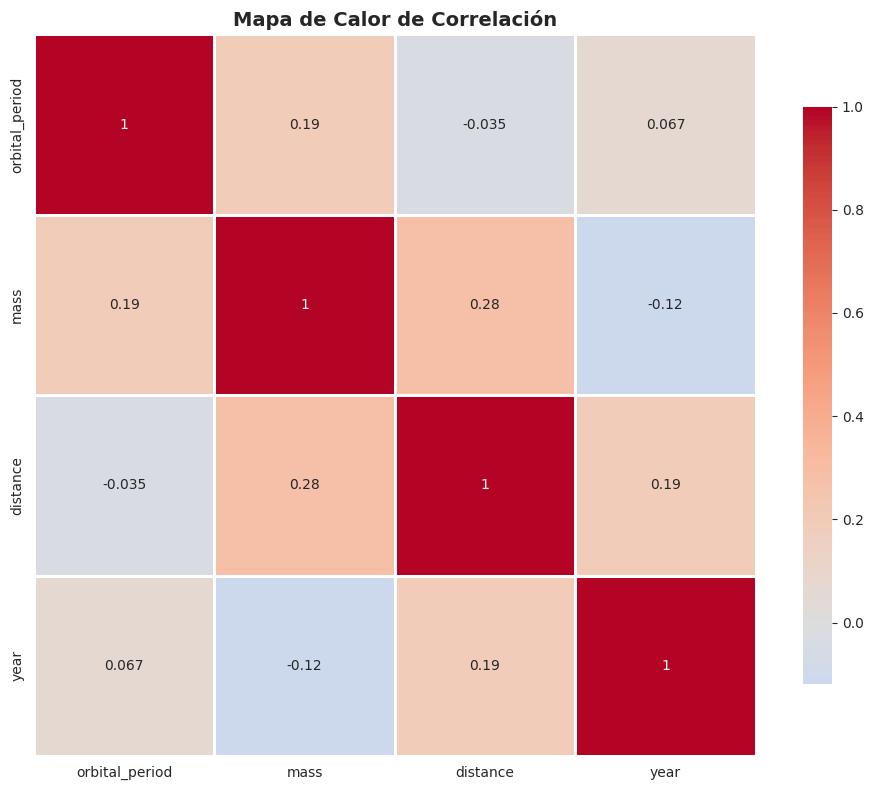

Mapa de calor de correlación creado


In [ ]:
# Mapa de calor de correlación
numeric_df = df_clean[['orbital_period', 'mass', 'distance', 'year']].dropna()

if len(numeric_df) > 0:
    plt.figure(figsize=(10, 8))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=1, cbar_kws={'shrink': 0.8})
    plt.title('Mapa de Calor de Correlación', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print('Mapa de calor de correlación creado')

## 7. Informe Resumen Final

In [ ]:
print('\n')
print('INFORME FINAL DE LIMPIEZA Y ANÁLISIS')
print('\n')

print('\n1. RESUMEN DE LIMPIEZA DE DATOS:')
print(f'- Filas originales: {len(df_dirty)}')
print(f'- Filas limpias: {len(df_clean)}')
print(f'- Filas eliminadas: {len(df_dirty) - len(df_clean)} ({((len(df_dirty) - len(df_clean))/len(df_dirty)*100):.2f}%)')
print(f'- Duplicados eliminados: {removed_duplicates}')

print('\n2. CALIDAD DE DATOS:')
print(f'- Total de valores faltantes: {df_clean.isnull().sum().sum()}')
print(f'- Columnas con datos faltantes: {(df_clean.isnull().sum() > 0).sum()}')

print('\n3. HALLAZGOS CLAVE:')
if 'method' in df_clean.columns:
    most_common_method = df_clean['method'].value_counts().index[0]
    method_count = df_clean['method'].value_counts().values[0]
    print(f'- Método de detección más común: {most_common_method} ({method_count} planetas)')

if 'year' in df_clean.columns:
    year_range = f'{int(df_clean['year'].min())} - {int(df_clean['year'].max())}'
    print(f'- Rango de años de descubrimiento: {year_range}')
    peak_year = df_clean['year'].value_counts().index[0]
    peak_count = df_clean['year'].value_counts().values[0]
    print(f'- Año pico de descubrimientos: {int(peak_year)} ({int(peak_count)} descubrimientos)')

if 'mass' in df_clean.columns:
    avg_mass = df_clean['mass'].mean()
    print(f'- Masa planetaria promedio: {avg_mass:.2f} masas de Júpiter')

if 'distance' in df_clean.columns:
    avg_distance = df_clean['distance'].mean()
    print(f'- Distancia promedio desde la Tierra: {avg_distance:.2f} parsecs')

print('\n4. DATASET LIMPIO:')
print(f'- Guardado como: clean_dataset.csv')
print(f'- Dimensiones: {df_clean.shape}')
print(f'- Columnas: {df_clean.columns.tolist()}')

print('\n')
print('¡LIMPIEZA Y ANÁLISIS DE DATOS COMPLETADOS!')



INFORME FINAL DE LIMPIEZA Y ANÁLISIS



1. RESUMEN DE LIMPIEZA DE DATOS:
- Filas originales: 1115
- Filas limpias: 1023
- Filas eliminadas: 92 (8.25%)
- Duplicados eliminados: 84

2. CALIDAD DE DATOS:
- Total de valores faltantes: 758
- Columnas con datos faltantes: 4

3. HALLAZGOS CLAVE:
- Método de detección más común: Radial Velocity (553 planetas)
- Rango de años de descubrimiento: 1992 - 2014
- Año pico de descubrimientos: 2011 (185 descubrimientos)
- Masa planetaria promedio: 2.64 masas de Júpiter
- Distancia promedio desde la Tierra: 259.34 parsecs

4. DATASET LIMPIO:
- Guardado como: clean_dataset.csv
- Dimensiones: (1023, 6)
- Columnas: ['method', 'number', 'orbital_period', 'mass', 'distance', 'year']


¡LIMPIEZA Y ANÁLISIS DE DATOS COMPLETADOS!
